# The Sparks Foundation

By: Tushar Arora

# Predict the result when student study 9.25 hours Per Day

import the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


insert the data from external source

In [ ]:
url= "https://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Distribution of Data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


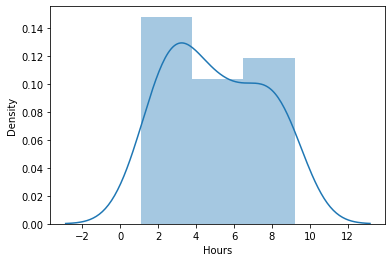

In [ ]:
sns.distplot(data['Hours'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


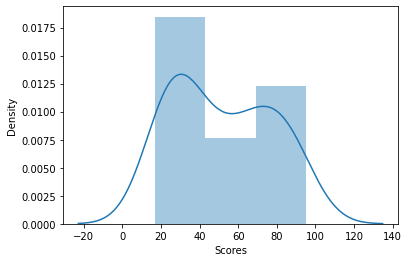

In [ ]:
sns.distplot(data['Scores'])

Data is not Distributed too much in Variance so there is no need of Standard Scaling

Check the relation between hours and scores

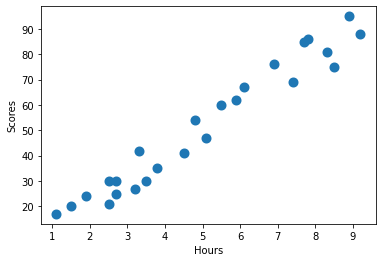

In [ ]:
plt.scatter(x='Hours',y='Scores',linewidths=4,data=data)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

*Score is increasing as the data no. of hours are incresing*

variable and feature selection

In [ ]:
y=data.iloc[:,1].values
x=data.iloc[:,:-1].values

split the data for train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


model selection



In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


Train the model

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

test the model on testing data

In [ ]:
y_pred=model.predict(x_test)

Compare the prediction and actual result

In [ ]:
comp=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
print(comp)

   Actual  Predicted
0      81  83.107332
1      30  26.765598
2      21  26.765598
3      76  69.507603
4      62  59.793511
5      25  28.708416
6      42  34.536871


In [ ]:
c=model.intercept_
m=model.coef_
line=m*x+c

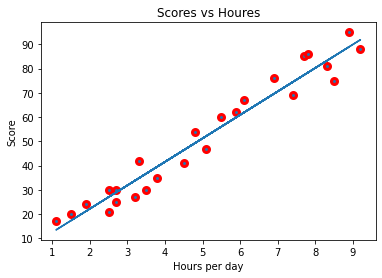

In [ ]:
plt.scatter(x='Hours',y='Scores',linewidth=3,edgecolors='red',data=data)
plt.plot(x,line)
plt.xlabel('Hours per day')
plt.ylabel('Score')
plt.title('Scores vs Houres')
plt.show()

Predict the result on 9.25 hours per day

In [ ]:
input_=[9.25]
output_=model.predict([input_])
print("No of Hours = {}".format(input_[0]))
print("Predicted Score = {}".format(output_[0]))


No of Hours = 9.25
Predicted Score = 92.38611528261494


Evaluating the model performance 

In [ ]:
from sklearn.metrics import *
MAE=mean_absolute_error(y_test,y_pred)
print(MAE)

3.9207511902099244
